# Estimating Pi

The following example should highlight, how one can convert most Python classes that take arguments into a ZnTrack stage.
Here we take on an example to Estimate the value Pi.
The original notebook can be found here https://gist.github.com/SamTov/907aebbc6c36a242e15e3745a91989eb .
There were only a few changes made:

    1. convert parameters to `DVC.params()`
    2. convert results to `DVC.result()`
    3. Add a `__call__` method for the adding the parameters to the class
    4. Add a `run` method that does the heavy lifting for us and runs the expensive computation

That's it - now we can use the `@Node()` decorator and we can even stay inside the Jupyter notebook.

In [1]:
from zntrack import ZnTrackProject, config

config.nb_name = "estimate_pi_with_mc.ipynb"

project = ZnTrackProject()
project.create_dvc_repository()

2021-10-20 10:33:36,718 (INFO): Setting up GIT/DVC repository.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from zntrack import Node, dvc

In [3]:
@Node()
class MCPi:
    """
    A class to study Monte Carlo sampling as applied to
    the computation of Pi.

    Attributes
    ----------
    coordinates : np.ndarray
            Coordinates of points plotted.
    n_circle_points : int
            Number of points in the circle
    n_points : int
            Total number of points.
    """

    coordinates = dvc.result()
    n_circle_points = dvc.result()
    n_points = dvc.params()

    def __call__(self, n_points):
        self.n_points = n_points

    def run(self):
        """
        Draw N points from a normal distribution.

        N : int
                Number of points to draw.
        """
        self.coordinates = np.random.random(size=(self.n_points, 2))
        self._circle_points()  # compute the number of points in the circle.

    def _circle_points(self):
        """
        Compute the number of points in the circle.
        """
        radial_values = np.linalg.norm(self.coordinates, axis=1)
        self.n_circle_points = len(list(filter(lambda x: x <= 1, radial_values)))

    def plot_image(self, axs=None):
        """
        Plot the circle, square, and points.

        Parameters
        ----------
        axs : mpl.axis
                An axis object to plot to if desired.
        """
        circle = plt.Circle((0, 0), 1, fill=False)
        square = patches.Rectangle((0, 0), 1, 1, fill=False)
        if axs is None:
            ax = plt.gca()
        else:
            ax = axs
        ax.set_xlim(-1.3, 1.3)
        ax.set_ylim(-1.3, 1.3)
        ax.spines.left.set_position("zero")
        ax.spines.right.set_color("none")
        ax.spines.bottom.set_position("zero")
        ax.spines.top.set_color("none")
        ax.xaxis.set_ticks_position("bottom")
        ax.yaxis.set_ticks_position("left")
        ax.add_patch(circle)
        ax.add_patch(square)
        ax.set_aspect("equal")
        plt.show()

    def plot_sampling(self, axs=None, show: bool = False):
        """
        Plot the result of the sampling.

        Parameters
        ----------
        axs : mpl.axis
                An axis object to plot to if desired.
        """
        coordinates = np.array(self.coordinates)
        circle = plt.Circle((0, 0), 1, fill=False, linewidth=3, edgecolor="k", zorder=10)
        square = patches.Rectangle(
            (0, 0), 1, 1, fill=False, linewidth=3, edgecolor="k", zorder=10
        )
        if axs is None:
            ax = plt.gca()
        else:
            ax = axs
        ax.set_xlim(-0.0, 1.0)
        ax.set_ylim(-0.0, 1.0)
        ax.spines.left.set_position("zero")
        ax.spines.right.set_color("none")
        ax.spines.bottom.set_position("zero")
        ax.spines.top.set_color("none")
        ax.xaxis.set_ticks_position("bottom")
        ax.yaxis.set_ticks_position("left")
        ax.plot(coordinates[:, 0], coordinates[:, 1], ".")
        inner_points = np.array(
            list(filter(lambda x: np.linalg.norm(x) <= 1, coordinates))
        )
        ax.plot(inner_points[:, 0], inner_points[:, 1], "r.")
        ax.add_patch(circle)
        ax.add_patch(square)
        ax.set_title(
            f"N: {self.n_points} ; $\pi$ = {4 * self.n_circle_points / self.n_points}"
        )
        ax.set_aspect("equal")

        if show:
            plt.show()

2021-10-20 10:33:39,901 (WARNING): Jupyter support is an experimental feature! Please save your notebook before running this command!
Submit issues to https://github.com/zincware/py-track.


[NbConvertApp] Converting notebook estimate_pi_with_mc.ipynb to script
[NbConvertApp] Writing 5100 bytes to estimate_pi_with_mc.py


Now let us define pi estimates with different numbers of points and run them all.

In [4]:
mc_study = MCPi()
mc_study(n_points=10000)
project.name = "n=10000"
project.queue()

mc_study(n_points=1000)
project.name = "n=1000"
project.queue()

mc_study(n_points=100)
project.name = "n=100"
project.run()

2021-10-20 10:33:43,181 (WARNING): --- Writing new DVC file! ---
2021-10-20 10:33:43,182 (WARNING): Overwriting existing configuration!
2021-10-20 10:33:46,190 (INFO): Creating 'dvc.yaml'
Adding stage 'MCPi' in 'dvc.yaml'

To track the changes with git, run:

	git add dvc.yaml outs/.gitignore

2021-10-20 10:33:46,195 (INFO): Running git add
2021-10-20 10:33:46,257 (INFO): Queue DVC stage
Queued experiment '24f5e6d' for future execution.
2021-10-20 10:33:48,853 (WARNING): --- Writing new DVC file! ---
2021-10-20 10:33:48,854 (WARNING): Overwriting existing configuration!
2021-10-20 10:33:51,961 (INFO): Modifying stage 'MCPi' in 'dvc.yaml'

To track the changes with git, run:

	git add dvc.yaml

2021-10-20 10:33:51,982 (INFO): Running git add
2021-10-20 10:33:52,020 (INFO): Queue DVC stage
Queued experiment 'ad70978' for future execution.
2021-10-20 10:33:54,243 (WARNING): --- Writing new DVC file! ---
2021-10-20 10:33:54,244 (WARNING): Overwriting existing configuration!
2021-10-20 10:3

	outs/.gitignore, src/__pycache__/MCPi.cpython-39.pyc


Running stage 'MCPi':
> python3 -c "from src.MCPi import MCPi; MCPi(load=True).run()"
2021-10-20 10:34:09,814 (WARNING): No results found!
Generating lock file 'dvc.lock'
Updating lock file 'dvc.lock'


	outs/.gitignore, src/__pycache__/MCPi.cpython-39.pyc


Running stage 'MCPi':
> python3 -c "from src.MCPi import MCPi; MCPi(load=True).run()"
2021-10-20 10:34:13,006 (WARNING): No results found!
Generating lock file 'dvc.lock'
Updating lock file 'dvc.lock'


	outs/.gitignore, src/__pycache__/MCPi.cpython-39.pyc



Reproduced experiment(s): n=100, n=1000, n=10000
To apply the results of an experiment to your workspace run:

	dvc exp apply <exp>

To promote an experiment to a Git branch run:

	dvc exp branch <exp> <branch>

2021-10-20 10:34:14,745 (INFO): Running git add
Changes for experiment 'n=100' have been applied to your current workspace.
2021-10-20 10:34:17,136 (INFO): Finished


We can now see our experiments and the respective hash values:


Let us load them and plot them after each other. Because all the calculations where already performed, this is simply loading the correct result files.

Changes for experiment 'n=10000' have been applied to your current workspace.


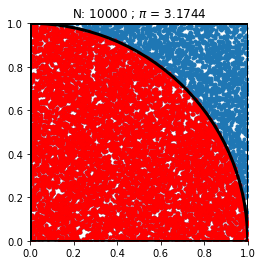

Changes for experiment 'n=1000' have been applied to your current workspace.


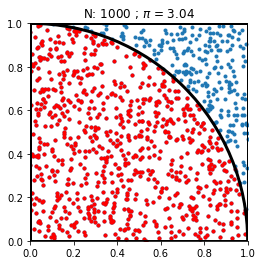

Changes for experiment 'n=100' have been applied to your current workspace.


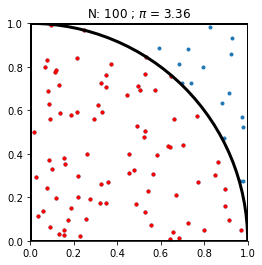

In [5]:
project.load("n=10000")
MCPi(load=True).plot_sampling(show=True)
project.load("n=1000")
MCPi(load=True).plot_sampling(show=True)
project.load("n=100")
MCPi(load=True).plot_sampling(show=True)

In [6]:
MCPi(load=True).coordinates

array([[0.09049637, 0.06191858],
       [0.44543622, 0.67076813],
       [0.52952539, 0.76712115],
       [0.1577208 , 0.05158053],
       [0.54065586, 0.22713318],
       [0.03741197, 0.11443025],
       [0.1137834 , 0.77689121],
       [0.96466182, 0.27703125],
       [0.52929332, 0.50345618],
       [0.15464197, 0.0287664 ],
       [0.10117628, 0.33051636],
       [0.15607617, 0.38156911],
       [0.16194616, 0.35540244],
       [0.69776121, 0.72423832],
       [0.72420662, 0.08260136],
       [0.48829385, 0.16747277],
       [0.45370845, 0.31299831],
       [0.34950054, 0.17358626],
       [0.09070042, 0.55888289],
       [0.76715597, 0.57404687],
       [0.21375608, 0.59151759],
       [0.89815191, 0.23624454],
       [0.24649276, 0.96832782],
       [0.85105129, 0.30181734],
       [0.25533295, 0.1002796 ],
       [0.22167602, 0.20194301],
       [0.0245311 , 0.29144833],
       [0.97799969, 0.52515924],
       [0.50722875, 0.69327239],
       [0.65694717, 0.0399641 ],
       [0.